# Data Exploration

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train_data = pd.read_csv("/kaggle/input/ys19-2023-assignment-2/train_set.csv")
valid_data = pd.read_csv("/kaggle/input/ys19-2023-assignment-2/valid_set.csv")
test_data = pd.read_csv("/kaggle/input/ys19-2023-assignment-2/test_set.csv")

print(train_data)

train_data.describe()

       New_ID                                               Text Sentiment  \
0       35027  #απολυμανση_κοριοι #απεντομωση_κοριος #απολυμα...   NEUTRAL   
1        9531  Έξι νέες επιστολές για τη Μακεδονία «καίνε» τη...  NEGATIVE   
2       14146  Ισχυρό ΚΚΕ, δύναμη του λαού στη Βουλή και στου...  POSITIVE   
3       28716  @five2nds @anthi7vas Μνημονιακότατο το #ΜεΡΑ25...   NEUTRAL   
4       32886  @ai_katerina Αυτό που είναι συγκλονιστικό είνα...   NEUTRAL   
...       ...                                                ...       ...   
36625   35374  @KourtakisJohn @kmitsotakis Ο Κούλης ο Μητσοτά...   NEUTRAL   
36626    7744  @enikos_gr @NChatzinikolaou @AdonisGeorgiadi Π...  NEGATIVE   
36627   35216  Η θέση του ΚΚΕ για την ασφάλεια των πολιτών κα...   NEUTRAL   
36628    2855  @thanosplevris Μαρη κακομοίρα θυγατέρα του ναζ...  NEGATIVE   
36629   25500  @gijjstalking @SpirosR76 Εντάξει με έπεισες! Κ...   NEUTRAL   

        Party  
0      SYRIZA  
1          ND  
2         KKE  

,New_ID
count,36630.000000
mean,18315.500000
std,10574.314517
min,1.000000
25%,9158.250000
50%,18315.500000
75%,27472.750000
max,36630.000000


# Data Preprocessing

Stemming

In [2]:
import re

__cases = dict()
__cases["ΦΑΓΙΑ"] = "ΦΑ"
__cases["ΦΑΓΙΟΥ"] = "ΦΑ"
__cases["ΦΑΓΙΩΝ"] = "ΦΑ"
__cases["ΣΚΑΓΙΑ"] = "ΣΚΑ"
__cases["ΣΚΑΓΙΟΥ"] = "ΣΚΑ"
__cases["ΣΚΑΓΙΩΝ"] = "ΣΚΑ"
__cases["ΟΛΟΓΙΟΥ"] = "ΟΛΟ"
__cases["ΟΛΟΓΙΑ"] = "ΟΛΟ"
__cases["ΟΛΟΓΙΩΝ"] = "ΟΛΟ"
__cases["ΣΟΓΙΟΥ"] = "ΣΟ"
__cases["ΣΟΓΙΑ"] = "ΣΟ"
__cases["ΣΟΓΙΩΝ"] = "ΣΟ"
__cases["ΤΑΤΟΓΙΑ"] = "ΤΑΤΟ"
__cases["ΤΑΤΟΓΙΟΥ"] = "ΤΑΤΟ"
__cases["ΤΑΤΟΓΙΩΝ"] = "ΤΑΤΟ"
__cases["ΚΡΕΑΣ"] = "ΚΡΕ"
__cases["ΚΡΕΑΤΟΣ"] = "ΚΡΕ"
__cases["ΚΡΕΑΤΑ"] = "ΚΡΕ"
__cases["ΚΡΕΑΤΩΝ"] = "ΚΡΕ"
__cases["ΠΕΡΑΣ"] = "ΠΕΡ"
__cases["ΠΕΡΑΤΟΣ"] = "ΠΕΡ"
__cases["ΠΕΡΑΤΑ"] = "ΠΕΡ"
__cases["ΠΕΡΑΤΩΝ"] = "ΠΕΡ"
__cases["ΤΕΡΑΣ"] = "ΤΕΡ"
__cases["ΤΕΡΑΤΟΣ"] = "ΤΕΡ"
__cases["ΤΕΡΑΤΑ"] = "ΤΕΡ"
__cases["ΤΕΡΑΤΩΝ"] = "ΤΕΡ"
__cases["ΦΩΣ"] = "ΦΩ"
__cases["ΦΩΤΟΣ"] = "ΦΩ"
__cases["ΦΩΤΑ"] = "ΦΩ"
__cases["ΦΩΤΩΝ"] = "ΦΩ"
__cases["ΚΑΘΕΣΤΩΣ"] = "ΚΑΘΕΣΤ"
__cases["ΚΑΘΕΣΤΩΤΟΣ"] = "ΚΑΘΕΣΤ"
__cases["ΚΑΘΕΣΤΩΤΑ"] = "ΚΑΘΕΣΤ"
__cases["ΚΑΘΕΣΤΩΤΩΝ"] = "ΚΑΘΕΣΤ"
__cases["ΓΕΓΟΝΟΣ"] = "ΓΕΓΟΝ"
__cases["ΓΕΓΟΝΟΤΟΣ"] = "ΓΕΓΟΝ"
__cases["ΓΕΓΟΝΟΤΑ"] = "ΓΕΓΟΝ"
__cases["ΓΕΓΟΝΟΤΩΝ"] = "ΓΕΓΟΝ"
__vowels = "[ΑΕΗΙΟΥΩ]"
__refinedVowels = "[ΑΕΗΙΟΩ]"


def stemWord(w: str, exceptions: dict = None):
    stem = None
    suffix = None
    test1 = True

    if exceptions is not None and w in exceptions.keys():
        return exceptions[w]

    if len(w) < 4:
        return w

    pattern = None
    pattern2 = None
    pattern3 = None
    pattern4 = None

    # Step1
    pattern = re.compile(
        r"(.*)(ΦΑΓΙΑ|ΦΑΓΙΟΥ|ΦΑΓΙΩΝ|ΣΚΑΓΙΑ|ΣΚΑΓΙΟΥ|ΣΚΑΓΙΩΝ|ΟΛΟΓΙΟΥ|ΟΛΟΓΙΑ|ΟΛΟΓΙΩΝ|ΣΟΓΙΟΥ|ΣΟΓΙΑ|ΣΟΓΙΩΝ|ΤΑΤΟΓΙΑ|ΤΑΤΟΓΙΟΥ|ΤΑΤΟΓΙΩΝ|ΚΡΕΑΣ|ΚΡΕΑΤΟΣ|ΚΡΕΑΤΑ|ΚΡΕΑΤΩΝ|ΠΕΡΑΣ|ΠΕΡΑΤΟΣ|ΠΕΡΑΤΑ|ΠΕΡΑΤΩΝ|ΤΕΡΑΣ|ΤΕΡΑΤΟΣ|ΤΕΡΑΤΑ|ΤΕΡΑΤΩΝ|ΦΩΣ|ΦΩΤΟΣ|ΦΩΤΑ|ΦΩΤΩΝ|ΚΑΘΕΣΤΩΣ|ΚΑΘΕΣΤΩΤΟΣ|ΚΑΘΕΣΤΩΤΑ|ΚΑΘΕΣΤΩΤΩΝ|ΓΕΓΟΝΟΣ|ΓΕΓΟΝΟΤΟΣ|ΓΕΓΟΝΟΤΑ|ΓΕΓΟΝΟΤΩΝ)$")

    if pattern.match(w):
        fp = pattern.match(w).groups()
        stem = fp[0]
        suffix = fp[1]
        w = stem + __cases[suffix]
        test1 = False

    # Step 2a
    pattern = re.compile(r"^(.+?)(ΑΔΕΣ|ΑΔΩΝ)$")
    if pattern.match(w):
        fp = pattern.match(w).groups()
        stem = fp[0]
        w = stem
        reg1 = re.compile(r"(ΟΚ|ΜΑΜ|ΜΑΝ|ΜΠΑΜΠ|ΠΑΤΕΡ|ΓΙΑΓΙ|ΝΤΑΝΤ|ΚΥΡ|ΘΕΙ|ΠΕΘΕΡ)$")

        if not reg1.match(w):
            w = w + "ΑΔ"

    # Step 2b
    pattern2 = re.compile(r"^(.+?)(ΕΔΕΣ|ΕΔΩΝ)$")
    if pattern2.match(w):
        fp = pattern2.match(w).groups()
        stem = fp[0]
        w = stem
        except2 = re.compile(r"(ΟΠ|ΙΠ|ΕΜΠ|ΥΠ|ΓΗΠ|ΔΑΠ|ΚΡΑΣΠ|ΜΙΛ)$")
        if except2.match(w):
            w = w + "ΕΔ"

    # Step 2c
    pattern3 = re.compile(r"^(.+?)(ΟΥΔΕΣ|ΟΥΔΩΝ)$")
    if pattern3.match(w):
        fp = pattern3.match(w).groups()
        stem = fp[0]
        w = stem
        except3 = re.compile(r"(ΑΡΚ|ΚΑΛΙΑΚ|ΠΕΤΑΛ|ΛΙΧ|ΠΛΕΞ|ΣΚ|Σ|ΦΛ|ΦΡ|ΒΕΛ|ΛΟΥΛ|ΧΝ|ΣΠ|ΤΡΑΓ|ΦΕ)$")
        if except3.match(w):
            w = w + "ΟΥΔ"

    # Step 2d
    pattern4 = re.compile("^(.+?)(ΕΩΣ|ΕΩΝ)$")
    if pattern4.match(w):
        fp = pattern4.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False
        except4 = re.compile(r"^(Θ|Δ|ΕΛ|ΓΑΛ|Ν|Π|ΙΔ|ΠΑΡ)$")
        if except4.match(w):
            w = w + "Ε"

    # Step 3
    pattern = re.compile(r"^(.+?)(ΙΑ|ΙΟΥ|ΙΩΝ)$")
    if pattern.match(w):
        fp = pattern.match(w).groups()
        stem = fp[0]
        w = stem
        pattern2 = re.compile(__vowels + "$")
        test1 = False
        if pattern2.match(w):
            w = stem + "Ι"

    # Step 4
    pattern = re.compile(r"^(.+?)(ΙΚΑ|ΙΚΟ|ΙΚΟΥ|ΙΚΩΝ)$")
    if pattern.match(w):
        fp = pattern.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False
        pattern2 = re.compile(__vowels + "$")
        except5 = re.compile(
            r"^(ΑΛ|ΑΔ|ΕΝΔ|ΑΜΑΝ|ΑΜΜΟΧΑΛ|ΗΘ|ΑΝΗΘ|ΑΝΤΙΔ|ΦΥΣ|ΒΡΩΜ|ΓΕΡ|ΕΞΩΔ|ΚΑΛΠ|ΚΑΛΛΙΝ|ΚΑΤΑΔ|ΜΟΥΛ|ΜΠΑΝ|ΜΠΑΓΙΑΤ|ΜΠΟΛ|ΜΠΟΣ|ΝΙΤ|ΞΙΚ|ΣΥΝΟΜΗΛ|ΠΕΤΣ|ΠΙΤΣ|ΠΙΚΑΝΤ|ΠΛΙΑΤΣ|ΠΟΣΤΕΛΝ|ΠΡΩΤΟΔ|ΣΕΡΤ|ΣΥΝΑΔ|ΤΣΑΜ|ΥΠΟΔ|ΦΙΛΟΝ|ΦΥΛΟΔ|ΧΑΣ)$")
        if except5.match(w) or pattern2.match(w):
            w = w + "ΙΚ"

    # step 5a
    pattern = re.compile(r"^(.+?)(ΑΜΕ)$")
    pattern2 = re.compile(r"^(.+?)(ΑΓΑΜΕ|ΗΣΑΜΕ|ΟΥΣΑΜΕ|ΗΚΑΜΕ|ΗΘΗΚΑΜΕ)$")
    if w == "ΑΓΑΜΕ":
        w = "ΑΓΑΜ"

    if pattern2.match(w):
        fp = pattern2.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False

    if pattern.match(w):
        fp = pattern.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False
        except6 = re.compile(r"^(ΑΝΑΠ|ΑΠΟΘ|ΑΠΟΚ|ΑΠΟΣΤ|ΒΟΥΒ|ΞΕΘ|ΟΥΛ|ΠΕΘ|ΠΙΚΡ|ΠΟΤ|ΣΙΧ|Χ)$")
        if except6.match(w):
            w = w + "ΑΜ"

    # Step 5b
    pattern2 = re.compile(r"^(.+?)(ΑΝΕ)$")
    pattern3 = re.compile(r"^(.+?)(ΑΓΑΝΕ|ΗΣΑΝΕ|ΟΥΣΑΝΕ|ΙΟΝΤΑΝΕ|ΙΟΤΑΝΕ|ΙΟΥΝΤΑΝΕ|ΟΝΤΑΝΕ|ΟΤΑΝΕ|ΟΥΝΤΑΝΕ|ΗΚΑΝΕ|ΗΘΗΚΑΝΕ)$")
    if pattern3.match(w):
        fp = pattern3.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False
        pattern3 = re.compile(r"^(ΤΡ|ΤΣ)$")
        if pattern3.match(w):
            w = w + "ΑΓΑΝ"

    if pattern2.match(w):
        fp = pattern2.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False
        pattern2 = re.compile(__refinedVowels + "$")
        except7 = re.compile(
            r"^(ΒΕΤΕΡ|ΒΟΥΛΚ|ΒΡΑΧΜ|Γ|ΔΡΑΔΟΥΜ|Θ|ΚΑΛΠΟΥΖ|ΚΑΣΤΕΛ|ΚΟΡΜΟΡ|ΛΑΟΠΛ|ΜΩΑΜΕΘ|Μ|ΜΟΥΣΟΥΛΜ|Ν|ΟΥΛ|Π|ΠΕΛΕΚ|ΠΛ|ΠΟΛΙΣ|ΠΟΡΤΟΛ|ΣΑΡΑΚΑΤΣ|ΣΟΥΛΤ|ΤΣΑΡΛΑΤ|ΟΡΦ|ΤΣΙΓΓ|ΤΣΟΠ|ΦΩΤΟΣΤΕΦ|Χ|ΨΥΧΟΠΛ|ΑΓ|ΟΡΦ|ΓΑΛ|ΓΕΡ|ΔΕΚ|ΔΙΠΛ|ΑΜΕΡΙΚΑΝ|ΟΥΡ|ΠΙΘ|ΠΟΥΡΙΤ|Σ|ΖΩΝΤ|ΙΚ|ΚΑΣΤ|ΚΟΠ|ΛΙΧ|ΛΟΥΘΗΡ|ΜΑΙΝΤ|ΜΕΛ|ΣΙΓ|ΣΠ|ΣΤΕΓ|ΤΡΑΓ|ΤΣΑΓ|Φ|ΕΡ|ΑΔΑΠ|ΑΘΙΓΓ|ΑΜΗΧ|ΑΝΙΚ|ΑΝΟΡΓ|ΑΠΗΓ|ΑΠΙΘ|ΑΤΣΙΓΓ|ΒΑΣ|ΒΑΣΚ|ΒΑΘΥΓΑΛ|ΒΙΟΜΗΧ|ΒΡΑΧΥΚ|ΔΙΑΤ|ΔΙΑΦ|ΕΝΟΡΓ|ΘΥΣ|ΚΑΠΝΟΒΙΟΜΗΧ|ΚΑΤΑΓΑΛ|ΚΛΙΒ|ΚΟΙΛΑΡΦ|ΛΙΒ|ΜΕΓΛΟΒΙΟΜΗΧ|ΜΙΚΡΟΒΙΟΜΗΧ|ΝΤΑΒ|ΞΗΡΟΚΛΙΒ|ΟΛΙΓΟΔΑΜ|ΟΛΟΓΑΛ|ΠΕΝΤΑΡΦ|ΠΕΡΗΦ|ΠΕΡΙΤΡ|ΠΛΑΤ|ΠΟΛΥΔΑΠ|ΠΟΛΥΜΗΧ|ΣΤΕΦ|ΤΑΒ|ΤΕΤ|ΥΠΕΡΗΦ|ΥΠΟΚΟΠ|ΧΑΜΗΛΟΔΑΠ|ΨΗΛΟΤΑΒ)$")
        if (pattern2.match(w)) or (except7.match(w)):
            w = w + "ΑΝ"

    # //Step 5c
    pattern3 = re.compile(r"^(.+?)(ΕΤΕ)$")
    pattern4 = re.compile(r"^(.+?)(ΗΣΕΤΕ)$")
    if pattern4.match(w):
        fp = pattern4.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False

    if pattern3.match(w):
        fp = pattern3.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False
        pattern3 = re.compile(__refinedVowels + "$")
        except8 = re.compile(
            r"(ΟΔ|ΑΙΡ|ΦΟΡ|ΤΑΘ|ΔΙΑΘ|ΣΧ|ΕΝΔ|ΕΥΡ|ΤΙΘ|ΥΠΕΡΘ|ΡΑΘ|ΕΝΘ|ΡΟΘ|ΣΘ|ΠΥΡ|ΑΙΝ|ΣΥΝΔ|ΣΥΝ|ΣΥΝΘ|ΧΩΡ|ΠΟΝ|ΒΡ|ΚΑΘ|ΕΥΘ|ΕΚΘ|ΝΕΤ|ΡΟΝ|ΑΡΚ|ΒΑΡ|ΒΟΛ|ΩΦΕΛ)$")
        except9 = re.compile(
            r"^(ΑΒΑΡ|ΒΕΝ|ΕΝΑΡ|ΑΒΡ|ΑΔ|ΑΘ|ΑΝ|ΑΠΛ|ΒΑΡΟΝ|ΝΤΡ|ΣΚ|ΚΟΠ|ΜΠΟΡ|ΝΙΦ|ΠΑΓ|ΠΑΡΑΚΑΛ|ΣΕΡΠ|ΣΚΕΛ|ΣΥΡΦ|ΤΟΚ|Υ|Δ|ΕΜ|ΘΑΡΡ|Θ)$")
        if (pattern3.match(w)) or (except8.match(w)) or (except9.match(w)):
            w = w + "ΕΤ"

    # Step 5d
    pattern = re.compile(r"^(.+?)(ΟΝΤΑΣ|ΩΝΤΑΣ)$")
    if pattern.match(w):
        fp = pattern.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False
        except10 = re.compile(r"^(ΑΡΧ)$")
        except11 = re.compile(r"(ΚΡΕ)$")
        if except10.match(w):
            w = w + "ΟΝΤ"
        if except11.match(w):
            w = w + "ΩΝΤ"

    # Step 5e
    pattern = re.compile(r"^(.+?)(ΟΜΑΣΤΕ|ΙΟΜΑΣΤΕ)$")
    if pattern.match(w):
        fp = pattern.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False
        except11 = re.compile("^(ΟΝ)$")
        if except11.match(w):
            w = w + "ΟΜΑΣΤ"

    # Step 5f
    pattern = re.compile(r"^(.+?)(ΕΣΤΕ)$")
    pattern2 = re.compile(r"^(.+?)(ΙΕΣΤΕ)$")
    if pattern2.match(w):
        fp = pattern2.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False
        pattern2 = re.compile(r"^(Π|ΑΠ|ΣΥΜΠ|ΑΣΥΜΠ|ΑΚΑΤΑΠ|ΑΜΕΤΑΜΦ)$")
        if pattern2.match(w):
            w = w + "ΙΕΣΤ"

    if pattern.match(w):
        fp = pattern.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False
        except12 = re.compile(r"^(ΑΛ|ΑΡ|ΕΚΤΕΛ|Ζ|Μ|Ξ|ΠΑΡΑΚΑΛ|ΑΡ|ΠΡΟ|ΝΙΣ)$")
        if except12.match(w):
            w = w + "ΕΣΤ"

    # Step 5g
    pattern = re.compile(r"^(.+?)(ΗΚΑ|ΗΚΕΣ|ΗΚΕ)$")
    pattern2 = re.compile(r"^(.+?)(ΗΘΗΚΑ|ΗΘΗΚΕΣ|ΗΘΗΚΕ)$")
    if pattern2.match(w):
        fp = pattern2.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False

    if pattern.match(w):
        fp = pattern.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False
        except13 = re.compile(r"(ΣΚΩΛ|ΣΚΟΥΛ|ΝΑΡΘ|ΣΦ|ΟΘ|ΠΙΘ)$")
        except14 = re.compile(r"^(ΔΙΑΘ|Θ|ΠΑΡΑΚΑΤΑΘ|ΠΡΟΣΘ|ΣΥΝΘ|)$")
        if (except13.match(w)) or (except14.match(w)):
            w = w + "ΗΚ"

    # Step 5h
    pattern = re.compile(r"^(.+?)(ΟΥΣΑ|ΟΥΣΕΣ|ΟΥΣΕ)$")
    if pattern.match(w):
        fp = pattern.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False
        except15 = re.compile(
            r"^(ΦΑΡΜΑΚ|ΧΑΔ|ΑΓΚ|ΑΝΑΡΡ|ΒΡΟΜ|ΕΚΛΙΠ|ΛΑΜΠΙΔ|ΛΕΧ|Μ|ΠΑΤ|Ρ|Λ|ΜΕΔ|ΜΕΣΑΖ|ΥΠΟΤΕΙΝ|ΑΜ|ΑΙΘ|ΑΝΗΚ|ΔΕΣΠΟΖ|ΕΝΔΙΑΦΕΡ|ΔΕ|ΔΕΥΤΕΡΕΥ|ΚΑΘΑΡΕΥ|ΠΛΕ|ΤΣΑ)$")
        except16 = re.compile(r"(ΠΟΔΑΡ|ΒΛΕΠ|ΠΑΝΤΑΧ|ΦΡΥΔ|ΜΑΝΤΙΛ|ΜΑΛΛ|ΚΥΜΑΤ|ΛΑΧ|ΛΗΓ|ΦΑΓ|ΟΜ|ΠΡΩΤ)$")
        if (except15.match(w)) or (except16.match(w)):
            w = w + "ΟΥΣ"

    # Step 5i
    pattern = re.compile(r"^(.+?)(ΑΓΑ|ΑΓΕΣ|ΑΓΕ)$")
    if pattern.match(w):
        fp = pattern.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False
        except17 = re.compile(r"^(ΨΟΦ|ΝΑΥΛΟΧ)$")
        except20 = re.compile(r"(ΚΟΛΛ)$")
        except18 = re.compile(
            r"^(ΑΒΑΣΤ|ΠΟΛΥΦ|ΑΔΗΦ|ΠΑΜΦ|Ρ|ΑΣΠ|ΑΦ|ΑΜΑΛ|ΑΜΑΛΛΙ|ΑΝΥΣΤ|ΑΠΕΡ|ΑΣΠΑΡ|ΑΧΑΡ|ΔΕΡΒΕΝ|ΔΡΟΣΟΠ|ΞΕΦ|ΝΕΟΠ|ΝΟΜΟΤ|ΟΛΟΠ|ΟΜΟΤ|ΠΡΟΣΤ|ΠΡΟΣΩΠΟΠ|ΣΥΜΠ|ΣΥΝΤ|Τ|ΥΠΟΤ|ΧΑΡ|ΑΕΙΠ|ΑΙΜΟΣΤ|ΑΝΥΠ|ΑΠΟΤ|ΑΡΤΙΠ|ΔΙΑΤ|ΕΝ|ΕΠΙΤ|ΚΡΟΚΑΛΟΠ|ΣΙΔΗΡΟΠ|Λ|ΝΑΥ|ΟΥΛΑΜ|ΟΥΡ|Π|ΤΡ|Μ)$")
        except19 = re.compile(r"(ΟΦ|ΠΕΛ|ΧΟΡΤ|ΛΛ|ΣΦ|ΡΠ|ΦΡ|ΠΡ|ΛΟΧ|ΣΜΗΝ)$")
        if (except18.match(w) and except19.match(w)) and not ((except17.match(w)) or (except20.match(w))):
            w = w + "ΑΓ"

    # Step 5j
    pattern = re.compile("^(.+?)(ΗΣΕ|ΗΣΟΥ|ΗΣΑ)$")
    if pattern.match(w):
        fp = pattern.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False
        except21 = re.compile(r"^(Ν|ΧΕΡΣΟΝ|ΔΩΔΕΚΑΝ|ΕΡΗΜΟΝ|ΜΕΓΑΛΟΝ|ΕΠΤΑΝ)$")
        if except21.match(w):
            w = w + "ΗΣ"

    # Step 5k
    pattern = re.compile(r"^(.+?)(ΗΣΤΕ)$")

    if pattern.match(w):
        fp = pattern.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False
        except22 = re.compile(r"^(ΑΣΒ|ΣΒ|ΑΧΡ|ΧΡ|ΑΠΛ|ΑΕΙΜΝ|ΔΥΣΧΡ|ΕΥΧΡ|ΚΟΙΝΟΧΡ|ΠΑΛΙΜΨ)$")
        if except22.match(w):
            w = w + "ΗΣΤ"

    # Step 5l
    pattern = re.compile("^(.+?)(ΟΥΝΕ|ΗΣΟΥΝΕ|ΗΘΟΥΝΕ)$")
    if pattern.match(w):
        fp = pattern.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False
        except23 = re.compile("^(Ν|Ρ|ΣΠΙ|ΣΤΡΑΒΟΜΟΥΤΣ|ΚΑΚΟΜΟΥΤΣ|ΕΞΩΝ)$")
        if except23.match(w):
            w = w + "ΟΥΝ"

    # Step 5l
    pattern = re.compile(r"^(.+?)(ΟΥΜΕ|ΗΣΟΥΜΕ|ΗΘΟΥΜΕ)$")
    if pattern.match(w):
        fp = pattern.match(w).groups()
        stem = fp[0]
        w = stem
        test1 = False
        except24 = re.compile(r"^(ΠΑΡΑΣΟΥΣ|Φ|Χ|ΩΡΙΟΠΛ|ΑΖ|ΑΛΛΟΣΟΥΣ|ΑΣΟΥΣ)$")
        if except24.match(w):
            w = w + "ΟΥΜ"

    # Step 6
    pattern = re.compile(r"^(.+?)(ΜΑΤΑ|ΜΑΤΩΝ|ΜΑΤΟΣ)$")
    pattern2 = re.compile(
        r"^(.+?)(Α|ΑΓΑΤΕ|ΑΓΑΝ|ΑΕΙ|ΑΜΑΙ|ΑΝ|ΑΣ|ΑΣΑΙ|ΑΤΑΙ|ΑΩ|Ε|ΕΙ|ΕΙΣ|ΕΙΤΕ|ΕΣΑΙ|ΕΣ|ΕΤΑΙ|Ι|ΙΕΜΑΙ|ΙΕΜΑΣΤΕ|ΙΕΤΑΙ|ΙΕΣΑΙ|ΙΕΣΑΣΤΕ|ΙΟΜΑΣΤΑΝ|ΙΟΜΟΥΝ|ΙΟΜΟΥΝΑ|ΙΟΝΤΑΝ|ΙΟΝΤΟΥΣΑΝ|ΙΟΣΑΣΤΑΝ|ΙΟΣΑΣΤΕ|ΙΟΣΟΥΝ|ΙΟΣΟΥΝΑ|ΙΟΤΑΝ|ΙΟΥΜΑ|ΙΟΥΜΑΣΤΕ|ΙΟΥΝΤΑΙ|ΙΟΥΝΤΑΝ|Η|ΗΔΕΣ|ΗΔΩΝ|ΗΘΕΙ|ΗΘΕΙΣ|ΗΘΕΙΤΕ|ΗΘΗΚΑΤΕ|ΗΘΗΚΑΝ|ΗΘΟΥΝ|ΗΘΩ|ΗΚΑΤΕ|ΗΚΑΝ|ΗΣ|ΗΣΑΝ|ΗΣΑΤΕ|ΗΣΕΙ|ΗΣΕΣ|ΗΣΟΥΝ|ΗΣΩ|Ο|ΟΙ|ΟΜΑΙ|ΟΜΑΣΤΑΝ|ΟΜΟΥΝ|ΟΜΟΥΝΑ|ΟΝΤΑΙ|ΟΝΤΑΝ|ΟΝΤΟΥΣΑΝ|ΟΣ|ΟΣΑΣΤΑΝ|ΟΣΑΣΤΕ|ΟΣΟΥΝ|ΟΣΟΥΝΑ|ΟΤΑΝ|ΟΥ|ΟΥΜΑΙ|ΟΥΜΑΣΤΕ|ΟΥΝ|ΟΥΝΤΑΙ|ΟΥΝΤΑΝ|ΟΥΣ|ΟΥΣΑΝ|ΟΥΣΑΤΕ|Υ|ΥΣ|Ω|ΩΝ)$")

    if pattern.match(w):
        fp = pattern.match(w).groups()
        stem = fp[0]
        w = stem + "ΜΑ"

    if pattern2.match(w) and test1:
        fp = pattern2.match(w).groups()
        stem = fp[0]
        w = stem

    # Step 7 (ΠΑΡΑΘΕΤΙΚΑ)
    pattern = re.compile(r"^(.+?)(ΕΣΤΕΡ|ΕΣΤΑΤ|ΟΤΕΡ|ΟΤΑΤ|ΥΤΕΡ|ΥΤΑΤ|ΩΤΕΡ|ΩΤΑΤ)$")
    if pattern.match(w):
        fp = pattern.match(w).groups()
        stem = fp[0]
        w = stem

    return w

Cleaning, tokenization and lowercasing

In [3]:
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

# text normilization (used for removal of acute accents)
def strip_accents(text):
   return ''.join(c for c in unicodedata.normalize('NFD', text)
                  if unicodedata.category(c) != 'Mn')

# load Greek stopwords from the gr_stopwords.txt which was created by a fellow classmate
stopwords_path = '/kaggle/input/gr-stopwords/gr_stopwords.txt'
with open(stopwords_path, 'r', encoding='utf-8') as file:
    gr_stopwords = set(file.read().splitlines())

# text processing
def preprocess_text(text):
    # remove links and tags
    text = re.sub(r"http\S+|www\S+|@[^\s]+", ' ', text)
    
    # remove acute accents from Greek vowels
    text = strip_accents(text)
    
    # remove special characters
    text = re.sub(r"[^A-Za-z0-9Α-Ωα-ω]+", ' ', text)
    
#     return text
    
    # tokenize the text
    tokens = word_tokenize(text)
    
    # uppercasing
    tokens = [token.upper() for token in tokens]
    
    # stopwords removal
    tokens = [token for token in tokens if token not in gr_stopwords]
    
    # stemming
    tokens = [stemWord(token) for token in tokens]
    
    return ' '.join(tokens)

train_data['Processed_Text'] = train_data['Text'].apply(preprocess_text)
valid_data['Processed_Text'] = valid_data['Text'].apply(preprocess_text)
test_data['Processed_Text'] = test_data['Text'].apply(preprocess_text)

# convert sentiment labels to numerical format
label_encoder = LabelEncoder()
train_data['Sentiment'] = label_encoder.fit_transform(train_data['Sentiment'])
valid_data['Sentiment'] = label_encoder.fit_transform(valid_data['Sentiment'])
print(train_data)

       New_ID                                               Text  Sentiment  \
0       35027  #απολυμανση_κοριοι #απεντομωση_κοριος #απολυμα...          1   
1        9531  Έξι νέες επιστολές για τη Μακεδονία «καίνε» τη...          0   
2       14146  Ισχυρό ΚΚΕ, δύναμη του λαού στη Βουλή και στου...          2   
3       28716  @five2nds @anthi7vas Μνημονιακότατο το #ΜεΡΑ25...          1   
4       32886  @ai_katerina Αυτό που είναι συγκλονιστικό είνα...          1   
...       ...                                                ...        ...   
36625   35374  @KourtakisJohn @kmitsotakis Ο Κούλης ο Μητσοτά...          1   
36626    7744  @enikos_gr @NChatzinikolaou @AdonisGeorgiadi Π...          0   
36627   35216  Η θέση του ΚΚΕ για την ασφάλεια των πολιτών κα...          1   
36628    2855  @thanosplevris Μαρη κακομοίρα θυγατέρα του ναζ...          0   
36629   25500  @gijjstalking @SpirosR76 Εντάξει με έπεισες! Κ...          1   

        Party                                     P

# Analysis

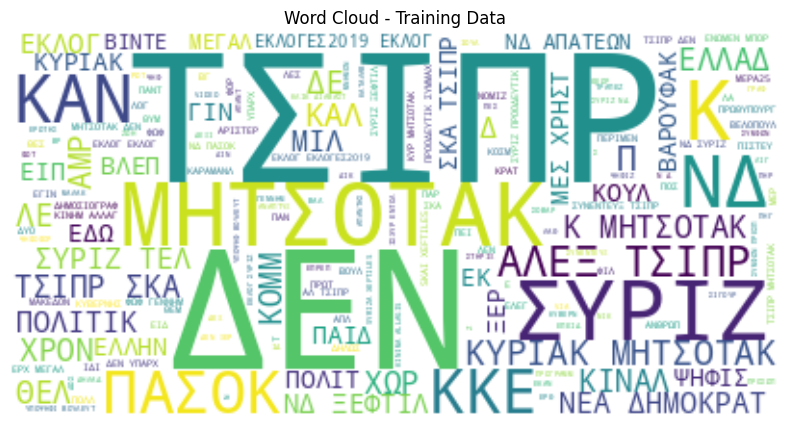

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# generate word clouds graph
def generate_word_cloud(text, title):
    wordcloud = WordCloud(background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_word_cloud(' '.join(train_data['Processed_Text']), 'Word Cloud - Training Data')

# Word Embeddings

Word2vec transformation using the pretrained model

In [5]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
import numpy as np

# combine the processed text from train, validation, and test sets to train the word2vec model
combined_text = pd.concat([train_data['Processed_Text'], 
                          valid_data['Processed_Text'], 
                          test_data['Processed_Text']])

# split the tokens
tokenized_text = [text.split() for text in combined_text]

# train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# save Word2Vec model
word2vec_model.save('word2vec_model.model')

# function to convert text to the average of word embeddings
def text_to_vector(text):
    words = text.split()  # Use split instead of word_tokenize
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(word2vec_model.vector_size)

# convert processed text to word embeddings
train_embeddings = np.vstack(train_data['Processed_Text'].apply(text_to_vector))
valid_embeddings = np.vstack(valid_data['Processed_Text'].apply(text_to_vector))
test_embeddings = np.vstack(test_data['Processed_Text'].apply(text_to_vector))
print(train_embeddings)

[[-0.22176243  0.29979917 -0.04614158 ... -0.52625674  0.16942376
   0.15425958]
 [-0.69928092  0.01976031  0.94873744 ... -0.54021245 -0.29922634
  -0.15812753]
 [-0.10134553 -0.08699112  0.2589865  ... -0.30934921  1.15979004
  -0.43990993]
 ...
 [-0.04116922  0.25567642  0.40312958 ... -0.20412834  0.38086432
   0.12669846]
 [-0.33658221  0.29341972  0.12318608 ... -0.38885072  0.28308374
   0.12931077]
 [-0.05274149  0.58065057  0.07354043 ... -0.27578536  0.55068964
   0.31157374]]


Convert data and labels to PyTorch tensors

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data embeddings and labels to PyTorch tensors
train_embeddings_tensor = torch.tensor(train_embeddings, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_data['Sentiment'].values, dtype=torch.long)

valid_embeddings_tensor = torch.tensor(valid_embeddings, dtype=torch.float32)
valid_labels_tensor = torch.tensor(valid_data['Sentiment'].values, dtype=torch.long)

test_embeddings_tensor = torch.tensor(test_embeddings, dtype=torch.float32)

# Create DataLoader for efficient batching during training
train_dataset = TensorDataset(train_embeddings_tensor, train_labels_tensor)
valid_dataset = TensorDataset(valid_embeddings_tensor, valid_labels_tensor)
test_dataset = TensorDataset(test_embeddings_tensor)

# Define batch size and create DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Model Architecture

In [7]:
class SentimentClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SentimentClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# hyperparameters
input_size = train_embeddings.shape[1]  # dimension of the word embeddings
hidden_size = 128
output_size = 3  # POSITIVE, NEUTRAL, NEGATIVE

# model setup
model = SentimentClassifier(input_size, hidden_size, output_size)

# loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training

Training Loop

Epoch [1/10], Training Loss: 1.0861, Validation Loss: 1.0787
Epoch [2/10], Training Loss: 1.0790, Validation Loss: 1.0761
Epoch [3/10], Training Loss: 1.0769, Validation Loss: 1.0736
Epoch [4/10], Training Loss: 1.0755, Validation Loss: 1.0747
Epoch [5/10], Training Loss: 1.0741, Validation Loss: 1.0742
Epoch [6/10], Training Loss: 1.0728, Validation Loss: 1.0735
Epoch [7/10], Training Loss: 1.0720, Validation Loss: 1.0753
Epoch [8/10], Training Loss: 1.0709, Validation Loss: 1.0755
Epoch [9/10], Training Loss: 1.0702, Validation Loss: 1.0723
Epoch [10/10], Training Loss: 1.0691, Validation Loss: 1.0740


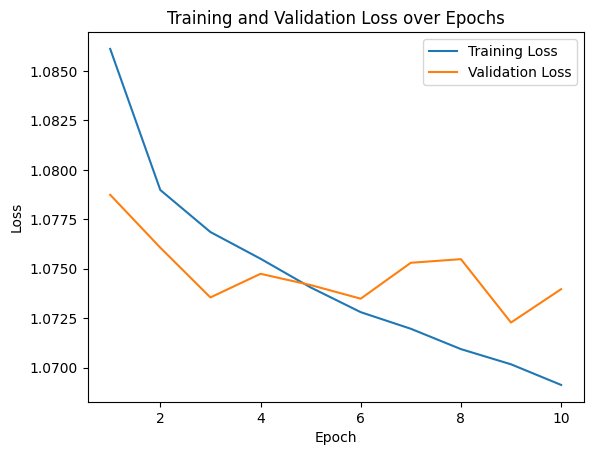

In [8]:
num_epochs = 10
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # calculate average training loss for the epoch
    average_train_loss = running_loss / len(train_loader)
    train_losses.append(average_train_loss)

    # validation loss
    model.eval()
    with torch.no_grad():
        valid_loss = 0.0
        for inputs, labels in valid_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()

    # calculate average validation loss for the epoch
    average_valid_loss = valid_loss / len(valid_loader)
    valid_losses.append(average_valid_loss)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {average_train_loss:.4f}, Validation Loss: {average_valid_loss:.4f}')

# plotting the training and validation loss
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

# Evaluation

Evaluation on the validation set

In [9]:
from sklearn.metrics import precision_recall_fscore_support

def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted', zero_division=1)
    print(f'Validation Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}')
    return f1

f1_score = evaluate_model(model, valid_loader)

Validation Precision: 0.4161, Recall: 0.4037, F1-score: 0.3796


# Hyperparameter tuning

In [10]:
import itertools

# Define hyperparameters to tune
learning_rates = [0.001, 0.01, 0.1]
hidden_sizes = [64, 128, 256]
batch_sizes = [32, 64, 128]

# Set up a grid search for hyperparameter tuning
best_score = 0.0
best_hyperparameters = {}

for lr, hidden_size, batch_size in itertools.product(learning_rates, hidden_sizes, batch_sizes):
    # Set up the model
    model = SentimentClassifier(input_size, hidden_size, output_size)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    num_epochs = 5  # Adjust as needed
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate on the validation set
    f1 = evaluate_model(model, valid_loader)

    # Check if this set of hyperparameters gives better accuracy
    if f1 > best_score:
        best_score = f1
        best_hyperparameters = {'Learning Rate': lr, 'Hidden Size': hidden_size, 'Batch Size': batch_size}

# Print the best hyperparameters
print(f'Best Hyperparameters: {best_hyperparameters}')

# Set up the model with the best hyperparameters
best_lr = best_hyperparameters['Learning Rate']
best_hidden_size = best_hyperparameters['Hidden Size']
best_batch_size = best_hyperparameters['Batch Size']

Validation Precision: 0.4089, Recall: 0.3943, F1-score: 0.3781
Validation Precision: 0.4004, Recall: 0.3920, F1-score: 0.3775
Validation Precision: 0.3974, Recall: 0.3960, F1-score: 0.3875
Validation Precision: 0.4061, Recall: 0.3989, F1-score: 0.3891
Validation Precision: 0.3931, Recall: 0.3909, F1-score: 0.3764
Validation Precision: 0.4336, Recall: 0.3962, F1-score: 0.3538
Validation Precision: 0.4153, Recall: 0.3960, F1-score: 0.3688
Validation Precision: 0.4242, Recall: 0.4027, F1-score: 0.3728
Validation Precision: 0.4141, Recall: 0.4008, F1-score: 0.3805
Validation Precision: 0.4923, Recall: 0.3788, F1-score: 0.2909
Validation Precision: 0.4651, Recall: 0.3878, F1-score: 0.3263
Validation Precision: 0.4994, Recall: 0.3727, F1-score: 0.2748
Validation Precision: 0.4595, Recall: 0.3811, F1-score: 0.3095
Validation Precision: 0.4888, Recall: 0.3903, F1-score: 0.3226
Validation Precision: 0.4786, Recall: 0.3719, F1-score: 0.2723
Validation Precision: 0.4430, Recall: 0.3893, F1-score:

Training and evaluating with the best hyperparameters

Epoch [1/10], Training Loss: 1.0863, Validation Loss: 1.0790
Epoch [2/10], Training Loss: 1.0795, Validation Loss: 1.0757
Epoch [3/10], Training Loss: 1.0771, Validation Loss: 1.0748
Epoch [4/10], Training Loss: 1.0756, Validation Loss: 1.0733
Epoch [5/10], Training Loss: 1.0738, Validation Loss: 1.0736
Epoch [6/10], Training Loss: 1.0728, Validation Loss: 1.0750
Epoch [7/10], Training Loss: 1.0719, Validation Loss: 1.0719
Epoch [8/10], Training Loss: 1.0708, Validation Loss: 1.0723
Epoch [9/10], Training Loss: 1.0702, Validation Loss: 1.0737
Epoch [10/10], Training Loss: 1.0684, Validation Loss: 1.0727


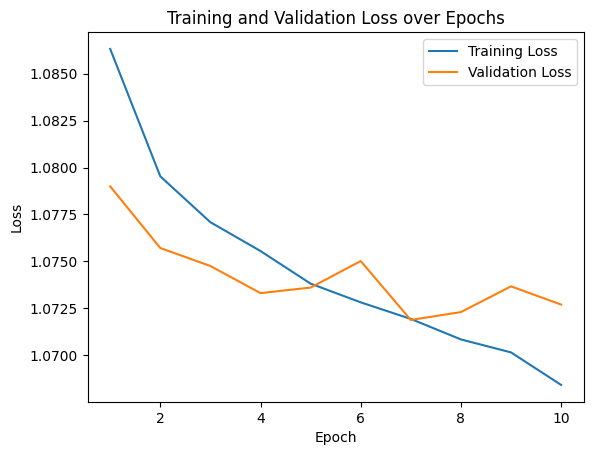

Validation Precision: 0.4080, Recall: 0.3962, F1-score: 0.3801


0.3801235117591989

In [11]:
model = SentimentClassifier(input_size, best_hidden_size, output_size)
optimizer = optim.Adam(model.parameters(), lr=best_lr)

num_epochs = 10
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # calculate average training loss for the epoch
    average_train_loss = running_loss / len(train_loader)
    train_losses.append(average_train_loss)

    # validation loss
    model.eval()
    with torch.no_grad():
        valid_loss = 0.0
        for inputs, labels in valid_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()

    # calculate average validation loss for the epoch
    average_valid_loss = valid_loss / len(valid_loader)
    valid_losses.append(average_valid_loss)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {average_train_loss:.4f}, Validation Loss: {average_valid_loss:.4f}')
    
# plotting the training and validation loss
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

# evaluate on the validation set using the best model
evaluate_model(model, valid_loader)

# Output prediction

In [12]:
def get_test_predictions(model, dataloader):
    model.eval()
    all_preds = []

    with torch.no_grad():
        for inputs in dataloader:
            outputs = model(inputs[0])
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())

    return all_preds

test_predictions = get_test_predictions(model, test_loader)

# convert encoded predictions back to sentiment labels
predicted_labels = label_encoder.inverse_transform(test_predictions)

submission = pd.DataFrame({'Id': test_data['New_ID'], 'Predicted': predicted_labels})
print(submission)

submission.to_csv('submission.csv', index=False)

          Id Predicted
0          1  NEGATIVE
1          2  POSITIVE
2          3  POSITIVE
3          4  POSITIVE
4          5  NEGATIVE
...      ...       ...
10465  10466  NEGATIVE
10466  10467  NEGATIVE
10467  10468  NEGATIVE
10468  10469  POSITIVE
10469  10470  NEGATIVE

[10470 rows x 2 columns]
